# Projeto de Data Science

Descrição:

Você é um cientista de dados em uma empresa de e-commerce e foi
encarregado de realizar uma análise detalhada das vendas da empresa. O
objetivo é entender os padrões de vendas e prever as vendas futuras com
base em dados históricos. Este projeto final irá testar suas habilidades em
Python, utilização da biblioteca Pandas para manipulação de dados,
aplicação de conceitos de estatística básica e a implementação de um
modelo de machine learning para previsão de vendas.
Requisitos do Projeto:

1.Coleta e Preparação dos Dados:
Utilize um conjunto de dados de vendas de e-commerce (pode ser um
dataset fictício ou real disponível publicamente).
Faça a leitura e manipulação dos dados usando a biblioteca Pandas em
Python. Limpe e organize os dados conforme necessário.

2.Análise Exploratória de Dados:
Realize uma análise exploratória para entender as características dos dados.
Utilize estatísticas descritivas para extrair insights, como média de vendas,
desvio padrão, mínimo e máximo.
Crie visualizações gráficas para representar as tendências de vendas,
distribuições de variáveis, etc.

3.Aplicação de Estatística Básica:
Aplique conceitos de estatística básica para testar hipóteses relacionadas
aos dados. Por exemplo, teste se há diferenças significativas nas vendas
entre diferentes categorias de produtos.

4.Modelagem de Machine Learning:
Desenvolva um modelo de machine learning para prever as vendas futuras.
Você pode escolher entre modelos de regressão, como regressão linear ou
árvores de decisão.
Divida os dados em conjuntos de treino e teste, treine seu modelo e avalie
sua performance usando métricas apropriadas.

5.Documentação e Código:
Documente todo o processo incluindo comentários explicativos sobre cada
etapa realizada.
Seu código deve ser limpo, bem organizado e fácil de entender.

6.Apresentação dos Resultados:
Prepare uma breve apresentação em slides, destacando suas descobertas, a
metodologia utilizada e os resultados do modelo de machine learning.

### Dataset
Link do dataset utilizado:
https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset/data

## Importações

In [6]:
!pip install pandas seaborn matplotlib numpy scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.0 MB 6.0 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/8.0 MB 6.0 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.0 MB 5.9 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.0 MB 5.9 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.0 MB 5.9 MB/s eta 0:00:01
   ----------------------------------- ---- 7.1/8.0 MB 6.0 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 5.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.1 MB 6.4 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/11.1 MB 6.2 MB/s eta 0:00:02
   ------------- -------------------------- 3.7/11.1 MB 6.0 MB/s eta 0:00:02
   -----------------


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## Opções para obter o dataset:
https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset/data

A primeira opção listada é pelo kagglehub

Para prosseguir, por favor escolher uma das opções para obter o dataset, apenas 1 é necessária, seja pelo kagglehub ou pelo download manual do arquivo do kaggle.

Se optar por fazer o download do csv manualmente, após do download extraia o arquivo e coloque-o na pasta inicial do notebook.

### kagglehub
Obtendo o dataset com kagglehub

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
import kagglehub

path = kagglehub.dataset_download("karkavelrajaj/amazon-sales-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.95M/1.95M [00:00<00:00, 2.17MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/karkavelrajaj/amazon-sales-dataset/versions/1


In [ ]:
!ls /root/.cache/kagglehub/datasets/karkavelrajaj/amazon-sales-dataset/versions/1

amazon.csv


Agora que temos o Caminho e o Nome do dataset, basta apenas criar o nosso dataframe:

In [4]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/karkavelrajaj/amazon-sales-dataset/versions/1/amazon.csv')

### Download manual do arquivo

Com o csv devidamente no seu notebook, basta criar o dataframe apontando o caminho correto:

In [3]:
df = pd.read_csv('amazon.csv')

## Análise inicial do Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [5]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [6]:
df['category'].unique()

array(['Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables',
       'Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables',
       'Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|RemoteControls',
       'Electronics|HomeTheater,TV&Video|Televisions|StandardTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|TVMounts,Stands&Turntables|TVWall&CeilingMounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|RCACables',
       'Electronics|HomeAudio|Accessories|SpeakerAccessories|Mounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|OpticalCables',
       'Electronics|HomeTheater,TV&Video|Projectors',
       'Electronics|HomeAudio|Accessories|Adapters',
       'Electronics|HomeTheater,TV&Video|SatelliteEquipment|SatelliteReceivers',
       'Computers&Acces

### Conclusão:

Notamos que esse dataset possui 16 colunas e 1465 registros. Todas as colunas têm o tipo de dado object, o que pode indicar a necessidade de conversão de colunas como discounted_price, actual_price, discount_percentage, rating, e rating_count para tipos numéricos para análises quantitativas. Há apenas 2 valores nulos na coluna rating_count.

As colunas incluem informações sobre produtos (como product_id, product_name, category), preços, avaliações (rating, rating_count, review_content) e links relacionados (img_link, product_link).

Nota-se também que a coluna categoria possui um número muito grande de dados, e que sua especifidade é decrescente, sendo assim um dado como 'Home&Kitchen|Heating,Cooling&AirQuality|Fans|PedestalFans' começa com 'Home&Kitchen', que é uma categoria mais genérica e termina com 'PedestalFans', que é mais específico.
Logo, categorias mais genéricas como 'Home&Kitchen' é mais comum de aparecer em diferentes produtos, enquanto categorias mais específicas aparecem menos.

## Limpeza dos dados

Na limpeza inicial, vamos alterar as colunas 'discounted_price' e 'actual_price' para serem do tipo float, vamos também remover os valores nulos com dropna() e vamos converter as colunas 'rating' e 'rating_count' para numéricos.

In [7]:
df['discounted_price'] = df['discounted_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)
df['actual_price'] = df['actual_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)

In [8]:
df = df.dropna()

In [9]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].replace({',': ''}, regex=True).astype(int)
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float) / 100

In [10]:
df = df.dropna()

### Removendo as colunas: 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link' e 'product_link'.

In [11]:
colunas_para_remover = ["product_id", "user_id", "user_name", "review_id", "review_title", "review_content", "img_link", "product_link"]
df.drop(columns=colunas_para_remover, inplace=True)

### Criação de duas novas features:
- discount_amount: Para sabermos o total do desconto;
- rating_category: Para podermos categorizar a avaliação como alta(high) ou baixa(low);

In [12]:
df['discount_amount'] = df['actual_price'] - df['discounted_price']
df['rating_category'] = df['rating'].apply(lambda x: 'High' if x >= 4 else 'Low')

### Vamos converter o valor de rúpias para reais
O dataset escolhido está com o valor em rúpias indianas, vamos converter esse valor para reais e criar duas novas colunas com esses valores 'discounted_price_brl' e 'actual_price_brl'.

Para isso, vamos utilizar a conversão do dia que este dataset está sendo analisado.

Uma rúpia vale 0,07 reais(análise feita em 27/01/2025).

Depois da conversão, vamos excluir as colunas 'discounted_price' e 'actual_price'.

In [13]:
taxa_cambio = 0.06  # 1 INR = 0.06 BRL

df['discounted_price_brl'] = df['discounted_price'] * taxa_cambio
df['actual_price_brl'] = df['actual_price'] * taxa_cambio

df[['product_name', 'discounted_price', 'discounted_price_brl', 'actual_price', 'actual_price_brl']].head()


,product_name,discounted_price,discounted_price_brl,actual_price,actual_price_brl
0,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,23.94,1099.0,65.94
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,11.94,349.0,20.94
2,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,11.94,1899.0,113.94
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,19.74,699.0,41.94
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,9.24,399.0,23.94


In [14]:
df.drop(columns=['discounted_price', 'actual_price'], inplace=True)

### Criação da coluna quantity_sold

Já que nosso dataset não possui uma coluna com a informação de quantidade de produtos vendidos, vamos criar uma coluna fictícia para podemos analisar a quantidade de venda posteriormente assim como tentar prever o quanto vai ser vendido no futuro.

In [15]:
np.random.seed(42)

df["quantity_sold"] = df["rating_count"] * np.random.uniform(1, 4, size=len(df))
df["quantity_sold"] = df["quantity_sold"].astype(int)

Ao final da limpeza e preparação dos dados, nosso dataset ficou assim:

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_name          1462 non-null   object 
 1   category              1462 non-null   object 
 2   discount_percentage   1462 non-null   float64
 3   rating                1462 non-null   float64
 4   rating_count          1462 non-null   int64  
 5   about_product         1462 non-null   object 
 6   discount_amount       1462 non-null   float64
 7   rating_category       1462 non-null   object 
 8   discounted_price_brl  1462 non-null   float64
 9   actual_price_brl      1462 non-null   float64
 10  quantity_sold         1462 non-null   int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 137.1+ KB


In [17]:
df.head()

,product_name,category,discount_percentage,rating,rating_count,about_product,discount_amount,rating_category,discounted_price_brl,actual_price_brl,quantity_sold
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,0.64,4.2,24269,High Compatibility : Compatible With iPhone 12...,700.0,High,23.94,65.94,51538
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,0.43,4.0,43994,"Compatible with all Type C enabled devices, be...",150.0,High,11.94,20.94,169471
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,0.90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,1700.0,Low,11.94,113.94,25337
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,0.53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,370.0,High,19.74,41.94,263836
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,0.61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,245.0,High,9.24,23.94,24817


## Análise exploratória e visualizações iniciais

### Insights do df.describe() =>

In [18]:
df.describe()

,discount_percentage,rating,rating_count,discount_amount,discounted_price_brl,actual_price_brl,quantity_sold
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1.462000e+03
mean,0.476724,4.096717,18307.376881,2323.105917,187.798910,327.185265,4.572888e+04
std,0.216139,0.289497,42766.096572,4608.569394,417.032883,653.068047,1.145637e+05
min,0.000000,2.000000,2.000000,0.000000,2.340000,2.340000,6.000000e+00
25%,0.320000,4.000000,1191.500000,370.250000,19.500000,48.000000,2.607500e+03
50%,0.500000,4.100000,5179.000000,800.000000,47.940000,100.200000,1.243250e+04
75%,0.630000,4.300000,17342.250000,1959.000000,119.940000,259.275000,3.960850e+04
max,0.940000,5.000000,426973.000000,61910.000000,4679.400000,8394.000000,1.493264e+06


Desconto e Preço: Existe uma grande disparidade entre os preços originais e os preços com desconto, o que pode indicar promoções agressivas ou uma estratégia de preços dinâmicos.
Avaliações: A maioria dos produtos tem boas avaliações, o que é positivo para a imagem da loja.
Quantidade de Avaliações: Alguns produtos têm um número alto de avaliações, o que pode significar que são populares e, possivelmente, mais vendidos.

### Análise das categorias com maior quantidade de produtos =>

In [19]:
vendas_por_categoria = df.groupby('category').agg(
    media_desconto=('discounted_price_brl', 'mean'),
    media_preco_original=('actual_price_brl', 'mean'),
    media_desconto_valor=('discount_amount', 'mean'),
    quantidade_produtos=('product_name', 'count')
).reset_index()

top_10_categorias = vendas_por_categoria.sort_values(by='quantidade_produtos', ascending=False).head(10)

print(top_10_categorias)

                                              category  media_desconto  \
10   Computers&Accessories|Accessories&Peripherals|...       21.714447   
119        Electronics|WearableTechnology|SmartWatches      140.381842   
117  Electronics|Mobiles&Accessories|Smartphones&Ba...      945.266471   
97   Electronics|HomeTheater,TV&Video|Televisions|S...     1490.411429   
76   Electronics|Headphones,Earbuds&Accessories|Hea...       58.570385   
93   Electronics|HomeTheater,TV&Video|Accessories|R...       26.336327   
169  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...      180.283289   
89   Electronics|HomeTheater,TV&Video|Accessories|C...       24.377500   
181  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...       45.730000   
18   Computers&Accessories|Accessories&Peripherals|...       36.560000   

     media_preco_original  media_desconto_valor  quantidade_produtos  
10              54.313070            543.310390                  231  
119            513.285789           6215.06

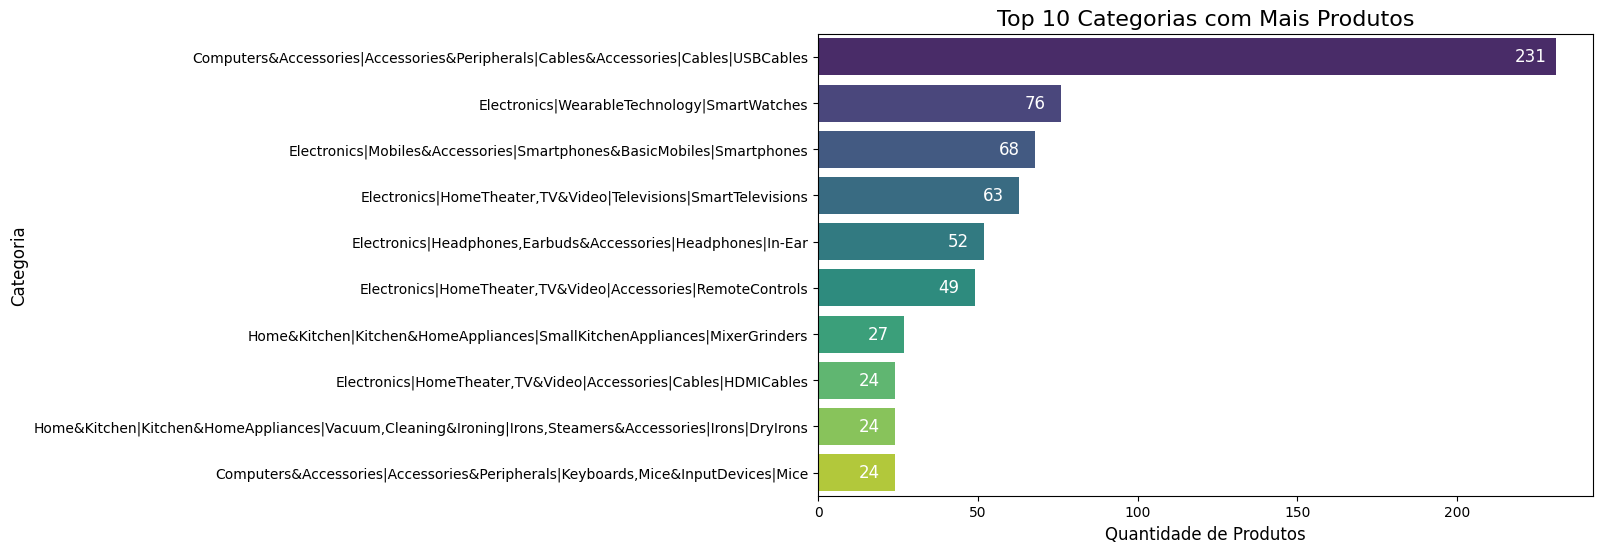

In [20]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='quantidade_produtos', y='category', data=top_10_categorias, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}', (p.get_width() -8, p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=12, color='white')

plt.title('Top 10 Categorias com Mais Produtos', fontsize=16)
plt.xlabel('Quantidade de Produtos', fontsize=12)
plt.ylabel('Categoria', fontsize=12)

plt.show()

Podemos ver que:

- Eletrônicos dominam as categorias com as maiores médias de preços e descontos, como as de Smartwatches e Televisores;
- Casa e cozinha são outras categorias que estão presentes no top 10;
- Headphones e Acessórios têm preços mais baixos com descontos menores, refletindo produtos mais acessíveis.
- Eletrodomésticos e pequenos aparelhos de cozinha têm uma quantidade menor de produtos, mas com um desconto médio interessante, mostrando promoções focadas em nichos específicos.

### Ratings

rating_category
High    1109
Low      353
Name: count, dtype: int64


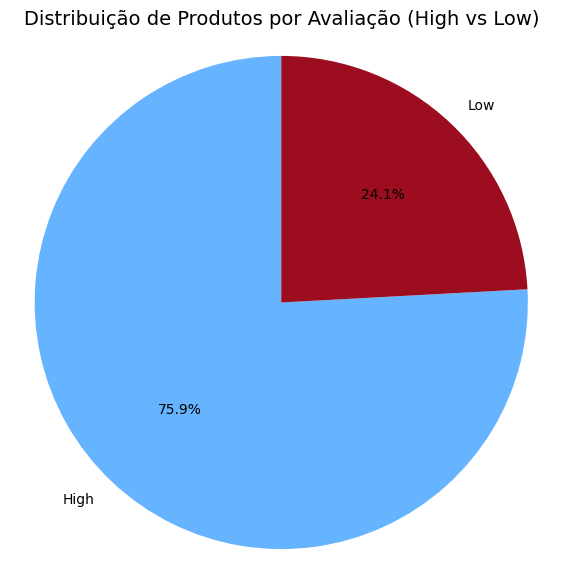

In [21]:
rating_counts = df['rating_category'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#9c0e1f'])
plt.title('Distribuição de Produtos por Avaliação (High vs Low)', fontsize=14)
plt.axis('equal')
print(rating_counts)
plt.show()

Segundo o gráfico, notamos que na totalidade 75.9% dos produtos possuem uma boa avaliação, enquanto 24.1 possui uma avaliação inferior a 4, que pode ser considerado ruim.

Nota-se então, que a loja vende, em sua maioria, produtos que são bem avaliados pelo cliente, mas ainda assim isso é algo que tem bastante espaço para melhorias.

Totalidade de produtos:
- com boa avaliação: 1109
- com má avaliação: 353

### Top 10 produtos mais avaliados:

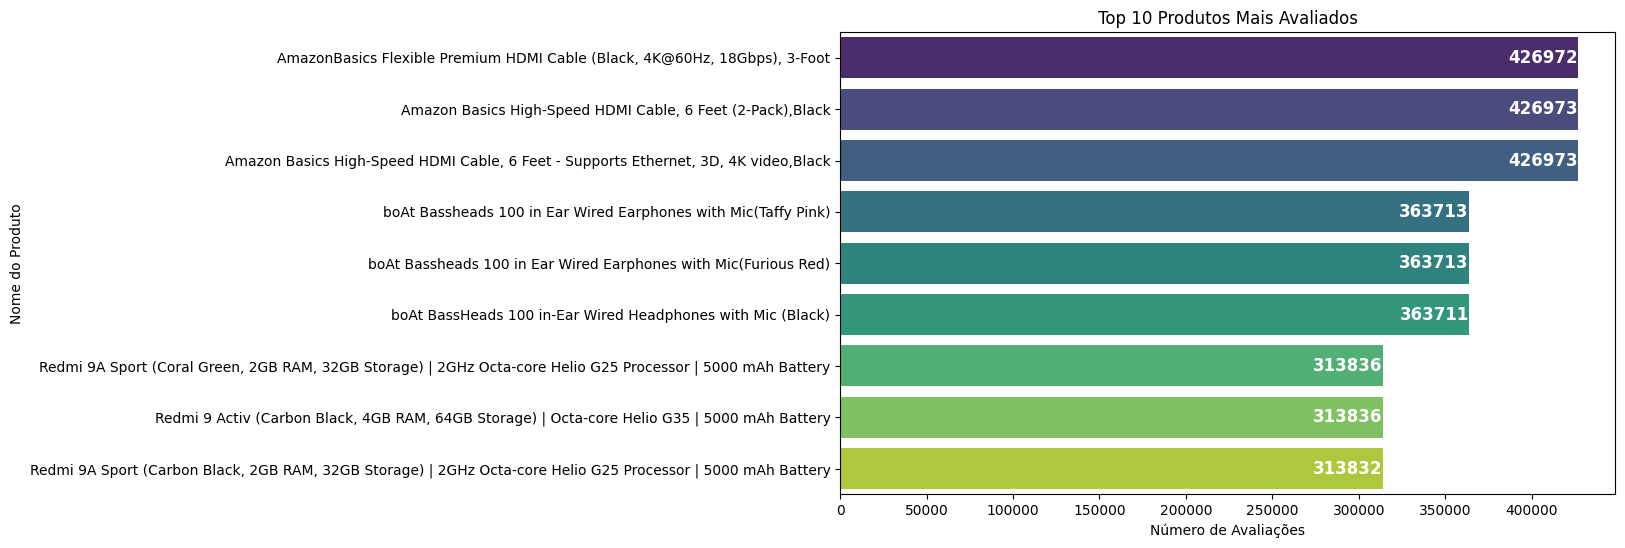

In [22]:
top_produtos = df.sort_values(by='rating_count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='rating_count', y='product_name', data=top_produtos, palette='viridis')

for p in ax.patches:
    ax.text(
        p.get_width() -50,
        p.get_y() + p.get_height() / 2,
        f'{int(p.get_width())}',
        ha='right',
        va='center',
        color='white',
        fontweight='bold',
        fontsize=12
    )

plt.title('Top 10 Produtos Mais Avaliados')
plt.xlabel('Número de Avaliações')
plt.ylabel('Nome do Produto')

plt.show()

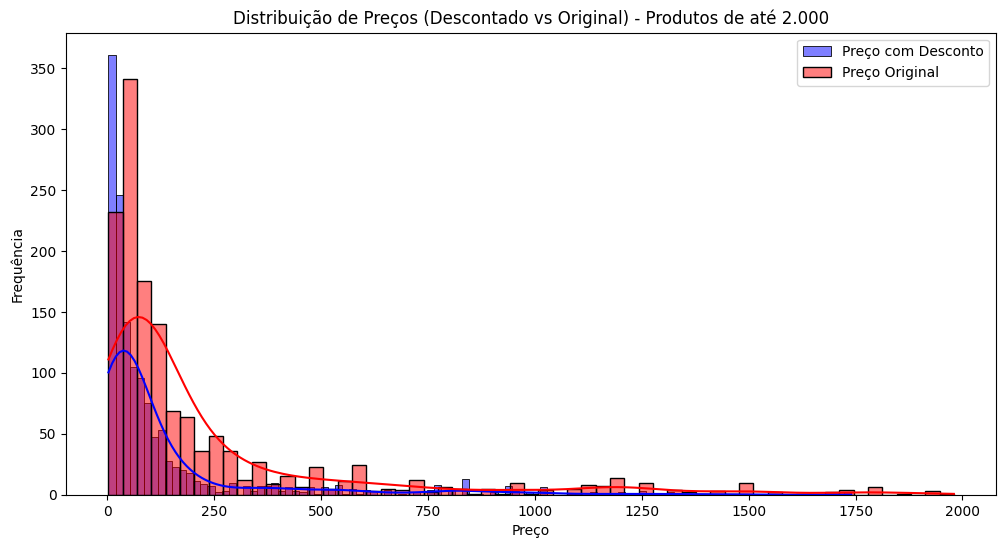

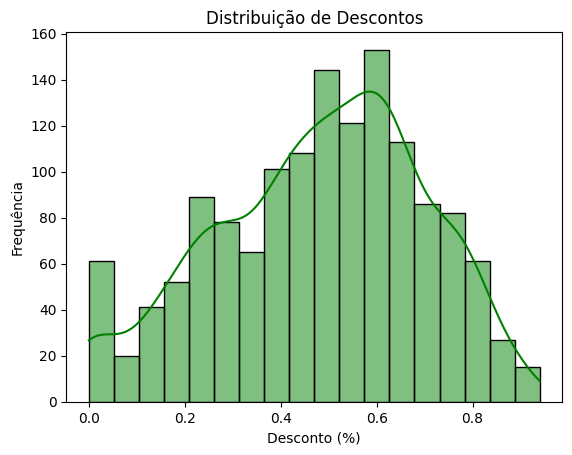

In [27]:
plt.figure(figsize=(12, 6))

df_filtered = df[(df['discounted_price_brl'] <= 2000) & (df['actual_price_brl'] <= 2000)]

sns.histplot(df_filtered['discounted_price_brl'], kde=True, color='blue', label='Preço com Desconto')
sns.histplot(df_filtered['actual_price_brl'], kde=True, color='red', label='Preço Original')
plt.legend()
plt.title('Distribuição de Preços (Descontado vs Original) - Produtos de até 2.000')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

sns.histplot(df_filtered['discount_percentage'].astype(float), kde=True, color='green')
plt.title('Distribuição de Descontos')
plt.xlabel('Desconto (%)')
plt.ylabel('Frequência')
plt.show()


OBS: O filtro foi feito para produtos de até 2.000 para melhor visualização do gráfico;

Podemos ver que os descontos dos produtos estão bem distribuídos, no range de 20% até 80% de desconto, sendo 60% de desconto o que possui maior frequência, ou seja, mais produtos com esse valor de desconto.

### Análise de correlações

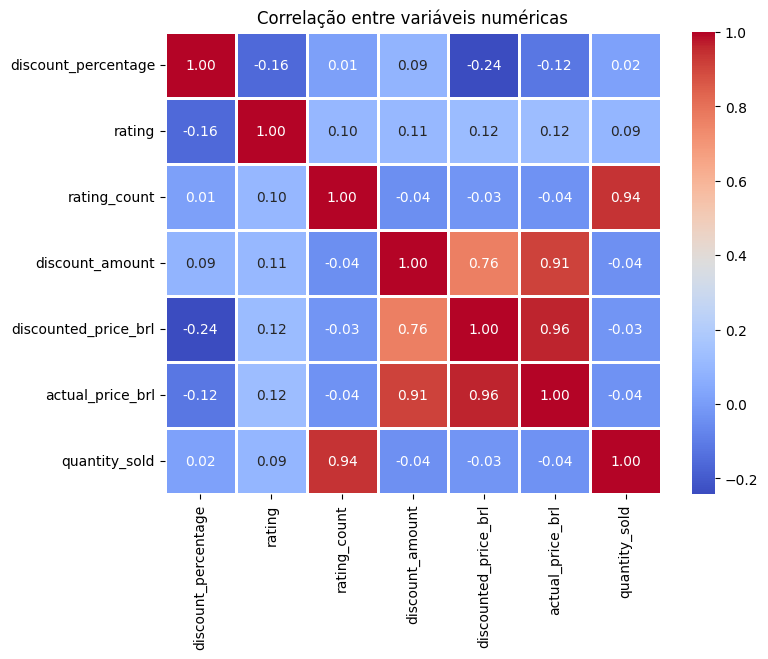

In [28]:
df_numerico = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(8, 6))
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlação entre variáveis numéricas')
plt.show()

Neste contexto o análise de correlações não faz muito sentido, mas resolvi deixá-lo aqui apenas para mostragem. De qualquer forma, notamos apenas uma correlação mais forte entre os preços e os descontos, sendo que as avaliações não pesam muito para as mudanças dos preços.

### Produtos mais vendidos

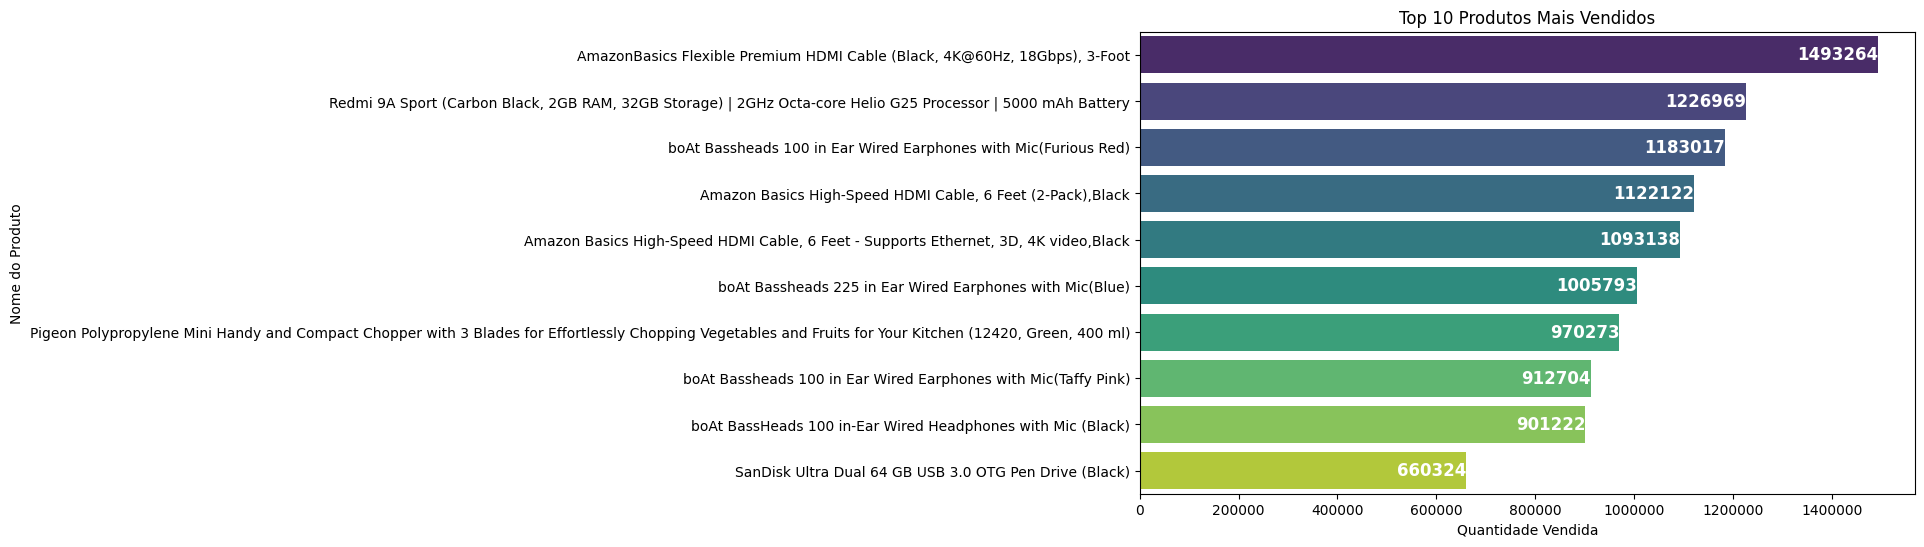

In [29]:
top_produtos = df.sort_values(by="quantity_sold", ascending=False).head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="quantity_sold", y="product_name", data=top_produtos, palette="viridis")

for p in ax.patches:
    ax.text(
        p.get_width() - 50,
        p.get_y() + p.get_height() / 2,
        f"{int(p.get_width())}",
        ha="right",
        va="center",
        color="white",
        fontweight="bold",
        fontsize=12
    )

plt.title("Top 10 Produtos Mais Vendidos")
plt.xlabel("Quantidade Vendida")
plt.ylabel("Nome do Produto")
plt.xticks(rotation=0)
plt.ticklabel_format(style="plain", axis="x")

plt.show()


## Modelagem de machine learning

### Modelo: *Regressão linear* aplicada para prever 'discounted_price_brl'

In [32]:
X = df[['actual_price_brl']]
y = df['discounted_price_brl']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MSE(Mean Squared Error): {mse:.2f}')
print(f'RMSE(Root Mean Squared Error): {rmse:.2f}')
print(f'R² (coeficiente de determinação): {r2:.2f}')

MSE(Mean Squared Error): 6851.37
RMSE(Root Mean Squared Error): 82.77
R² (coeficiente de determinação): 0.93


- Aqui, utilizamos o actual_price_brl como a variável independente 'X', este será utilizado para prever o preço com desconto;
- y é a variável dependente, o que queremos prever;
- Dividimos os dados em conjunto de treino e teste;
- Criamos o modelo 'LinearRegression()' e fizemos previsões com o modelo 'y_pred';

Resultados:

- MSE(Mean Squared Error): 6851.37
- RMSE(Root Mean Squared Error): 82.77
- R² (coeficiente de determinação): 0.93

### Modelo: *Decision Tree* aplicada para prever 'discounted_price_brl'

In [33]:
X = df[['actual_price_brl', 'discount_percentage', 'rating_category']]
X = pd.get_dummies(X, columns=['rating_category'], drop_first=True)
y = df['discounted_price_brl']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_dt = DecisionTreeRegressor(random_state=42)
modelo_dt.fit(X_train, y_train)
y_pred_dt = modelo_dt.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'MSE: {mse_dt:.2f}')
print(f'RMSE: {rmse_dt:.2f}')
print(f'R²: {r2_dt:.2f}')


MSE: 1303.85
RMSE: 36.11
R²: 0.99


Aqui, utilizamos actual_price_brl, discount_percentage e rating_category como variáveis independentes 'X'. Essas características foram usadas para prever o preço com desconto (discounted_price_brl).
Convertendo rating_category para variáveis dummy, transformamos os dados categóricos em numéricos.
Dividimos os dados em conjunto de treino e teste.
Criamos o modelo DecisionTreeRegressor() e fizemos previsões com y_pred_dt.

Resultados:

MSE (Mean Squared Error): 1303.85

RMSE (Root Mean Squared Error): 36.11

R² (Coeficiente de determinação): 0.99

### Resumo dos Modelos
- No modelo de regressão linear, obtivemos um MSE de 6851.37, um RMSE de 82.77 e um R² de 0.93.
- Já no modelo de Árvore de Decisão, os resultados foram significativamente melhores, com um MSE de 1303.85, um RMSE de 36.11 e um R² de 0.99.
- Isso indica que a Árvore de Decisão consegue prever os preços com desconto com muito mais precisão, reduzindo o erro e aumentando o poder de explicação do modelo.

- Apesar de resultados melhores no modelo de Árvore de decisão, Um R² tão alto (0.99) pode ser um sinal de que o modelo está superajustado (overfitting);

### Modelo: *Regressão linear* aplicada para prever 'quantity_sold'

In [34]:
X = df[["actual_price_brl", "discount_percentage", "rating", "discount_amount", "rating_count"]]
y = df["quantity_sold"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MSE (Mean Squared Error): {mse:.2f}')
print(f'RMSE (Root Mean Squared Error): {rmse:.2f}')
print(f'R² (Coeficiente de Determinação): {r2:.2f}')

MSE (Mean Squared Error): 2008970256.96
RMSE (Root Mean Squared Error): 44821.54
R² (Coeficiente de Determinação): 0.87


O modelo de Regressão Linear apresenta um R² alto (0,87), sugerindo uma forte relação entre as variáveis preditoras e a quantidade vendida. No entanto, o RMSE relativamente alto (~44.821) indica que as previsões ainda possuem um erro significativo.

### Modelo: *Decision Tree* aplicada para prever 'quantity_sold'

In [37]:
modelo_tree = DecisionTreeRegressor(random_state=42)
modelo_tree.fit(X_train, y_train)

y_pred_tree = modelo_tree.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = mse_tree ** 0.5
r2_tree = r2_score(y_test, y_pred_tree)

print(f'Árvore de Decisão - RMSE: {rmse_tree}')
print(f'Árvore de Decisão - R²: {r2_tree}')


Árvore de Decisão - RMSE: 72613.56854900552
Árvore de Decisão - R²: 0.6482848235667854


Vamos ajustar o modelo para adicionar => max_depth=10, min_samples_leaf=5

In [38]:
modelo_tree_tuned = DecisionTreeRegressor(random_state=42, max_depth=10, min_samples_leaf=5)
modelo_tree_tuned.fit(X_train, y_train)

y_pred_tuned = modelo_tree_tuned.predict(X_test)

mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = mse_tuned ** 0.5
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f'Árvore de Decisão Ajustada - RMSE: {rmse_tuned}')
print(f'Árvore de Decisão Ajustada - R²: {r2_tuned}')

Árvore de Decisão Ajustada - RMSE: 48794.26462473925
Árvore de Decisão Ajustada - R²: 0.8411844211216645


Validação cruzada:

In [40]:
modelo_tree_tuned = DecisionTreeRegressor(random_state=42, max_depth=10, min_samples_leaf=5)

scores = cross_val_score(modelo_tree_tuned, X, y, cv=5, scoring='neg_mean_squared_error')

rmse_scores = np.sqrt(-scores)

print(f'RMSE da validação cruzada: {rmse_scores}')
print(f'Média do RMSE: {rmse_scores.mean()}')

RMSE da validação cruzada: [52424.48347533 72935.61801597 60638.45914795 25591.7689739
  5633.75015415]
Média do RMSE: 43444.81595345852


Conclusão:
O modelo de Árvore de Decisão demonstrou bom desempenho, com variação controlada entre os folds.
A média do RMSE, 48,794.26, indica que o modelo é eficiente para prever as vendas futuras com um erro médio de cerca de 48,794.26 unidades.
A alta variabilidade observada em alguns folds (como o valor de 88,539.49) sugere que o modelo pode se beneficiar de ajustes adicionais ou outras técnicas para lidar melhor com dados dispersos.
Com base nesses resultados, o modelo pode ser utilizado como uma ferramenta eficaz para prever as vendas futuras, embora o desempenho em alguns casos específicos possa ser melhorado.